In [ ]:
!pip install umap-learn
!pip install --upgrade pandas

In [ ]:
import pickle
import numpy as np
from sklearn.cluster import KMeans
import umap
import matplotlib.pyplot as plt
from collections import defaultdict

In [ ]:
# Load the clean prompts from the pickle file
with open('/content/prompts.pkl', 'rb') as f:
    prompts = pickle.load(f)

# Load the precomputed embeddings for the clean prompts
embeddings = np.load('/content/paraphraseMini_prompt_embeddings.npy')

In [ ]:
# Step 1: Apply UMAP for dimensionality reduction
# Experiment with n_neighbors and min_dist for tighter clusters
umap_reducer = umap.UMAP(n_components=2, n_neighbors=25, min_dist=0.05, random_state=42)
umap_embeddings = umap_reducer.fit_transform(embeddings)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
# Step 2: Apply K-means on the UMAP-reduced data
k = 50  # Number of clusters (adjust as needed)
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(umap_embeddings)

# Step 3: Map prompts to their corresponding clusters
clustered_prompts = defaultdict(list)
for i, cluster in enumerate(clusters):
    clustered_prompts[cluster].append(prompts[i])

In [ ]:
# Define cluster topics for all clusters, including 0-29
cluster_topics = {
    0: "Creative storytelling and whimsical narratives",
    1: "Factual knowledge, scientific explanations, and general trivia",
    2: "Programming and mathematical problem-solving",
    3: "Simple greetings and casual conversation",
    4: "Logic puzzles and problem-solving scenarios",
    5: "Technical commands and hardware/software usage",
    6: "Detailed explanations and analytical thinking",
    7: "Friendly greetings with minor inquiries",
    8: "Complex logical problems and hypothetical scenarios",
    9: "Advanced writing tasks and content generation",
    10: "Minimalistic or repetitive instructions",
    11: "Travel-related queries and natural observations",
    12: "Basic categorization and simple questions",
    13: "Philosophical questions and existential thoughts",
    14: "Humorous and satirical creative content",
    15: "Creative writing of haikus and poetry",
    16: "Political and world affairs discussions",
    17: "Quick trivia and wordplay",
    18: "Hypothetical debates and conspiracy theories",
    19: "Family relationships and logical reasoning puzzles",
    20: "Formal writing and domain-specific tasks",
    21: "Philosophical debates and structured opinions",
    22: "Poetry and artistic expression in specific styles",
    23: "Observations about the natural world",
    24: "Programming-specific questions and explanations",
    25: "Detailed storytelling and fictional writing",
    26: "Technical and licensing queries with niche writing tasks",
    27: "Humor and joke creation",
    28: "Prohibited or inappropriate queries",
    29: "Mathematical puzzles and calculations",
    30: "Language play, complex reasoning, and meta-cognitive queries",
    31: "Creative culinary suggestions and poetic expressions",
    32: "Scientific queries, translations, and data-focused questions",
    33: "Family-based logic puzzles and etymological name analyses",
    34: "Technical programming explanations and step-by-step reasoning",
    35: "Travel comparisons, text unscrambling, and historical references",
    36: "Artistic inspirations, philosophical musings, and cultural insights",
    37: "Testing concepts and minimalistic prompts",
    38: "Weight-based puzzles, casual humor, and creative misdirection",
    39: "Complex relational puzzles and SQL/database-focused queries",
    40: "Advanced technical concepts, query languages, and unique applications",
    41: "Creative course descriptions, ASCII art, and physics explanations",
    42: "Ultra-minimalistic or repetitive prompts",
    43: "Day-related greetings and casual interactions",
    44: "Apple-themed logic puzzles and humorous analogies",
    45: "Woodchuck-based humor and sentence analysis",
    46: "Rap battles, lyrical creativity, and humorous debates",
    47: "Roleplay-based storytelling and fantasy scenarios",
    48: "Simple date-based reasoning and conversational prompts",
    49: "Rhyming words, technical jargon, and executive orders"

}


# Print summary of cluster sizes with topics
for cluster in sorted(clustered_prompts.keys()):  # Sort cluster keys for ordered output
    cluster_prompts = clustered_prompts[cluster]
    cluster_topic = cluster_topics.get(cluster, "Unknown Topic")
    print(f"Cluster {cluster}: {len(cluster_prompts)} prompts ({cluster_topic})")

# Inspect the first few prompts in each cluster
for cluster in sorted(clustered_prompts.keys()):  # Sort cluster keys for ordered output
    cluster_prompts = clustered_prompts[cluster]
    cluster_topic = cluster_topics.get(cluster, "Unknown Topic")
    print(f"\nCluster {cluster} ({cluster_topic} - Sample prompts):")
    for prompt in cluster_prompts[:10]:  # Show first 3 prompts in each cluster
        print(f"- {prompt}")


Cluster 0: 3041 prompts (Creative storytelling and whimsical narratives)
Cluster 1: 2019 prompts (Factual knowledge, scientific explanations, and general trivia)
Cluster 2: 1134 prompts (Programming and mathematical problem-solving)
Cluster 3: 542 prompts (Simple greetings and casual conversation)
Cluster 4: 146 prompts (Logic puzzles and problem-solving scenarios)
Cluster 5: 2615 prompts (Technical commands and hardware/software usage)
Cluster 6: 144 prompts (Detailed explanations and analytical thinking)
Cluster 7: 162 prompts (Friendly greetings with minor inquiries)
Cluster 8: 402 prompts (Complex logical problems and hypothetical scenarios)
Cluster 9: 2528 prompts (Advanced writing tasks and content generation)
Cluster 10: 45 prompts (Minimalistic or repetitive instructions)
Cluster 11: 1342 prompts (Travel-related queries and natural observations)
Cluster 12: 273 prompts (Basic categorization and simple questions)
Cluster 13: 98 prompts (Philosophical questions and existential th

<ipython-input-7-e57beb66d0a6>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', k)  # Get distinct colors from the 'tab20' colormap


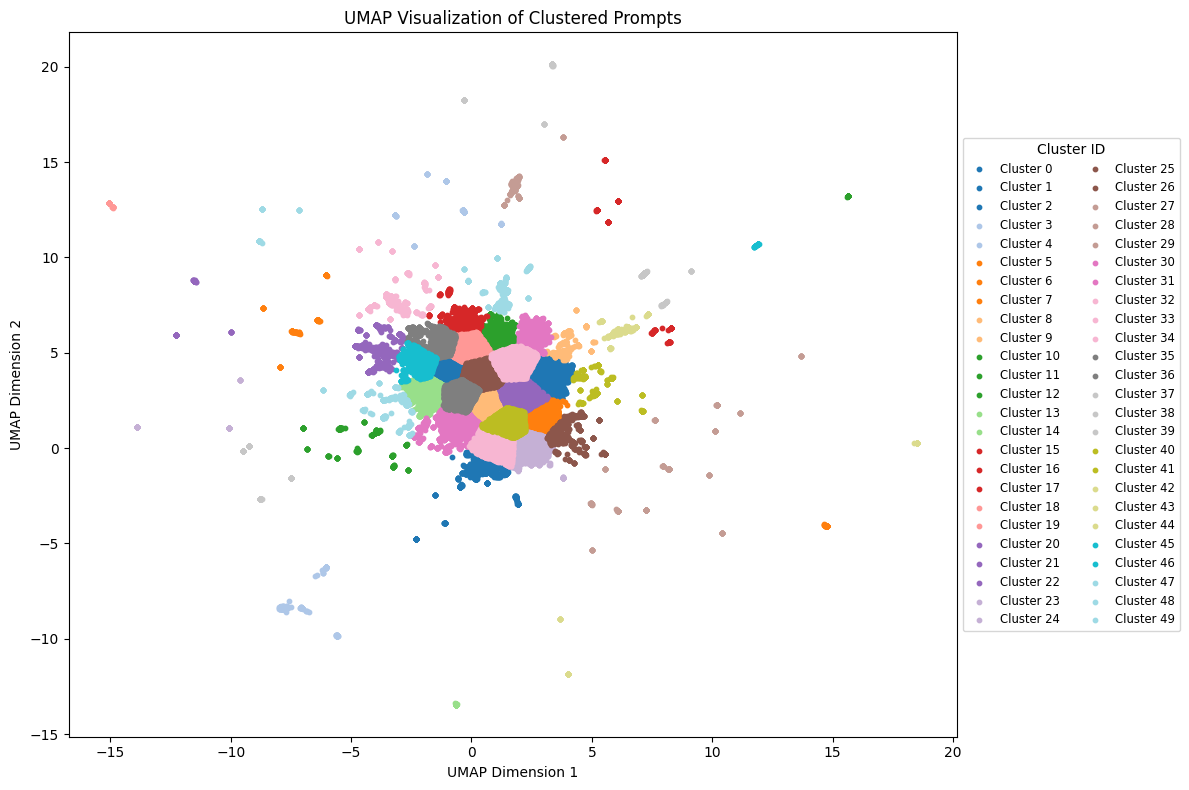

In [ ]:
# Define a color palette for the clusters
colors = plt.cm.get_cmap('tab20', k)  # Get distinct colors from the 'tab20' colormap

# Step 4: Plot the UMAP clusters
plt.figure(figsize=(12, 8))

# Plot each cluster with its corresponding color
for cluster_id in range(k):
    cluster_points = umap_embeddings[clusters == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                color=colors(cluster_id),
                label=f"Cluster {cluster_id}",
                s=10)  # Use smaller markers (s=10) for better visualization

# Customize the plot
plt.title("UMAP Visualization of Clustered Prompts")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")

# Add the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Cluster ID", ncol=2, fontsize='small')

# Show the plot
plt.tight_layout()
plt.show()

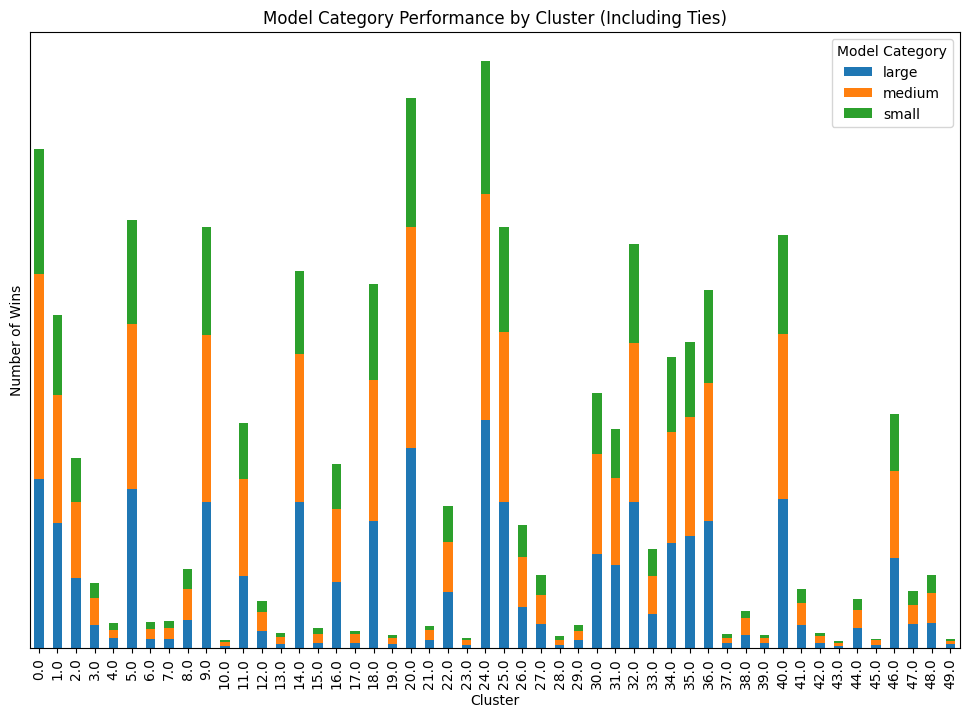

winning_categories dominant_category  total
cluster                                    
0.0                           medium   2085
1.0                           medium   1392
2.0                           medium    794
3.0                           medium    271
4.0                            large    102
5.0                           medium   1788
6.0                           medium    106
7.0                           medium    114
8.0                           medium    328
9.0                           medium   1759
10.0                          medium     34
11.0                          medium    939
12.0                          medium    196
13.0                          medium     60
14.0                          medium   1573
15.0                          medium     81
16.0                          medium    769
17.0                          medium     69
18.0                          medium   1521
19.0                          medium     55
20.0                          me

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the updated dataset
data_path = '/content/single_turn_with_prompt_cleaned.csv'
df = pd.read_csv(data_path)

prompt_to_cluster = {prompt: cluster for prompt, cluster in zip(prompts, clusters)}

# Assuming 'prompt_cleaned' is already clean, map prompts to clusters
df['cluster'] = df['prompt_cleaned'].map(prompt_to_cluster)

# Remove rows where model_category_a is the same as model_category_b
df = df[df['model_category_a'] != df['model_category_b']]

# Function to determine the winner (count ties as wins for both models)
def determine_winner(row):
    if row['winner_model_a'] == 1:
        return [row['model_category_a']]
    elif row['winner_model_b'] == 1:
        return [row['model_category_b']]
    elif row['winner_tie'] == 1:
        return [row['model_category_a'], row['model_category_b']]
    return []

# Apply the function to calculate the winning category (can return multiple categories for ties)
df['winning_categories'] = df.apply(determine_winner, axis=1)

# Explode the list of winners to create separate rows for ties
df_exploded = df.explode('winning_categories')

# Group by cluster and winning category
cluster_wins = df_exploded.groupby('cluster')['winning_categories'].value_counts().unstack(fill_value=0)
cluster_wins['total'] = cluster_wins.sum(axis=1)

# Plotting the data
cluster_wins.drop(columns='total').plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Model Category Performance by Cluster (Including Ties)')
plt.xlabel('Cluster')
plt.ylabel('Number of Wins')
plt.legend(title='Model Category')

# Remove y-axis numbers
plt.yticks([])

plt.show()

# Display the dominant category for each cluster
cluster_wins['dominant_category'] = cluster_wins.drop(columns='total').idxmax(axis=1)
print(cluster_wins[['dominant_category', 'total']])


<ipython-input-10-7b829185b1e6>:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  numeric_data = cluster_wins.drop(columns='total').applymap(lambda x: category_mapping.get(x, x))


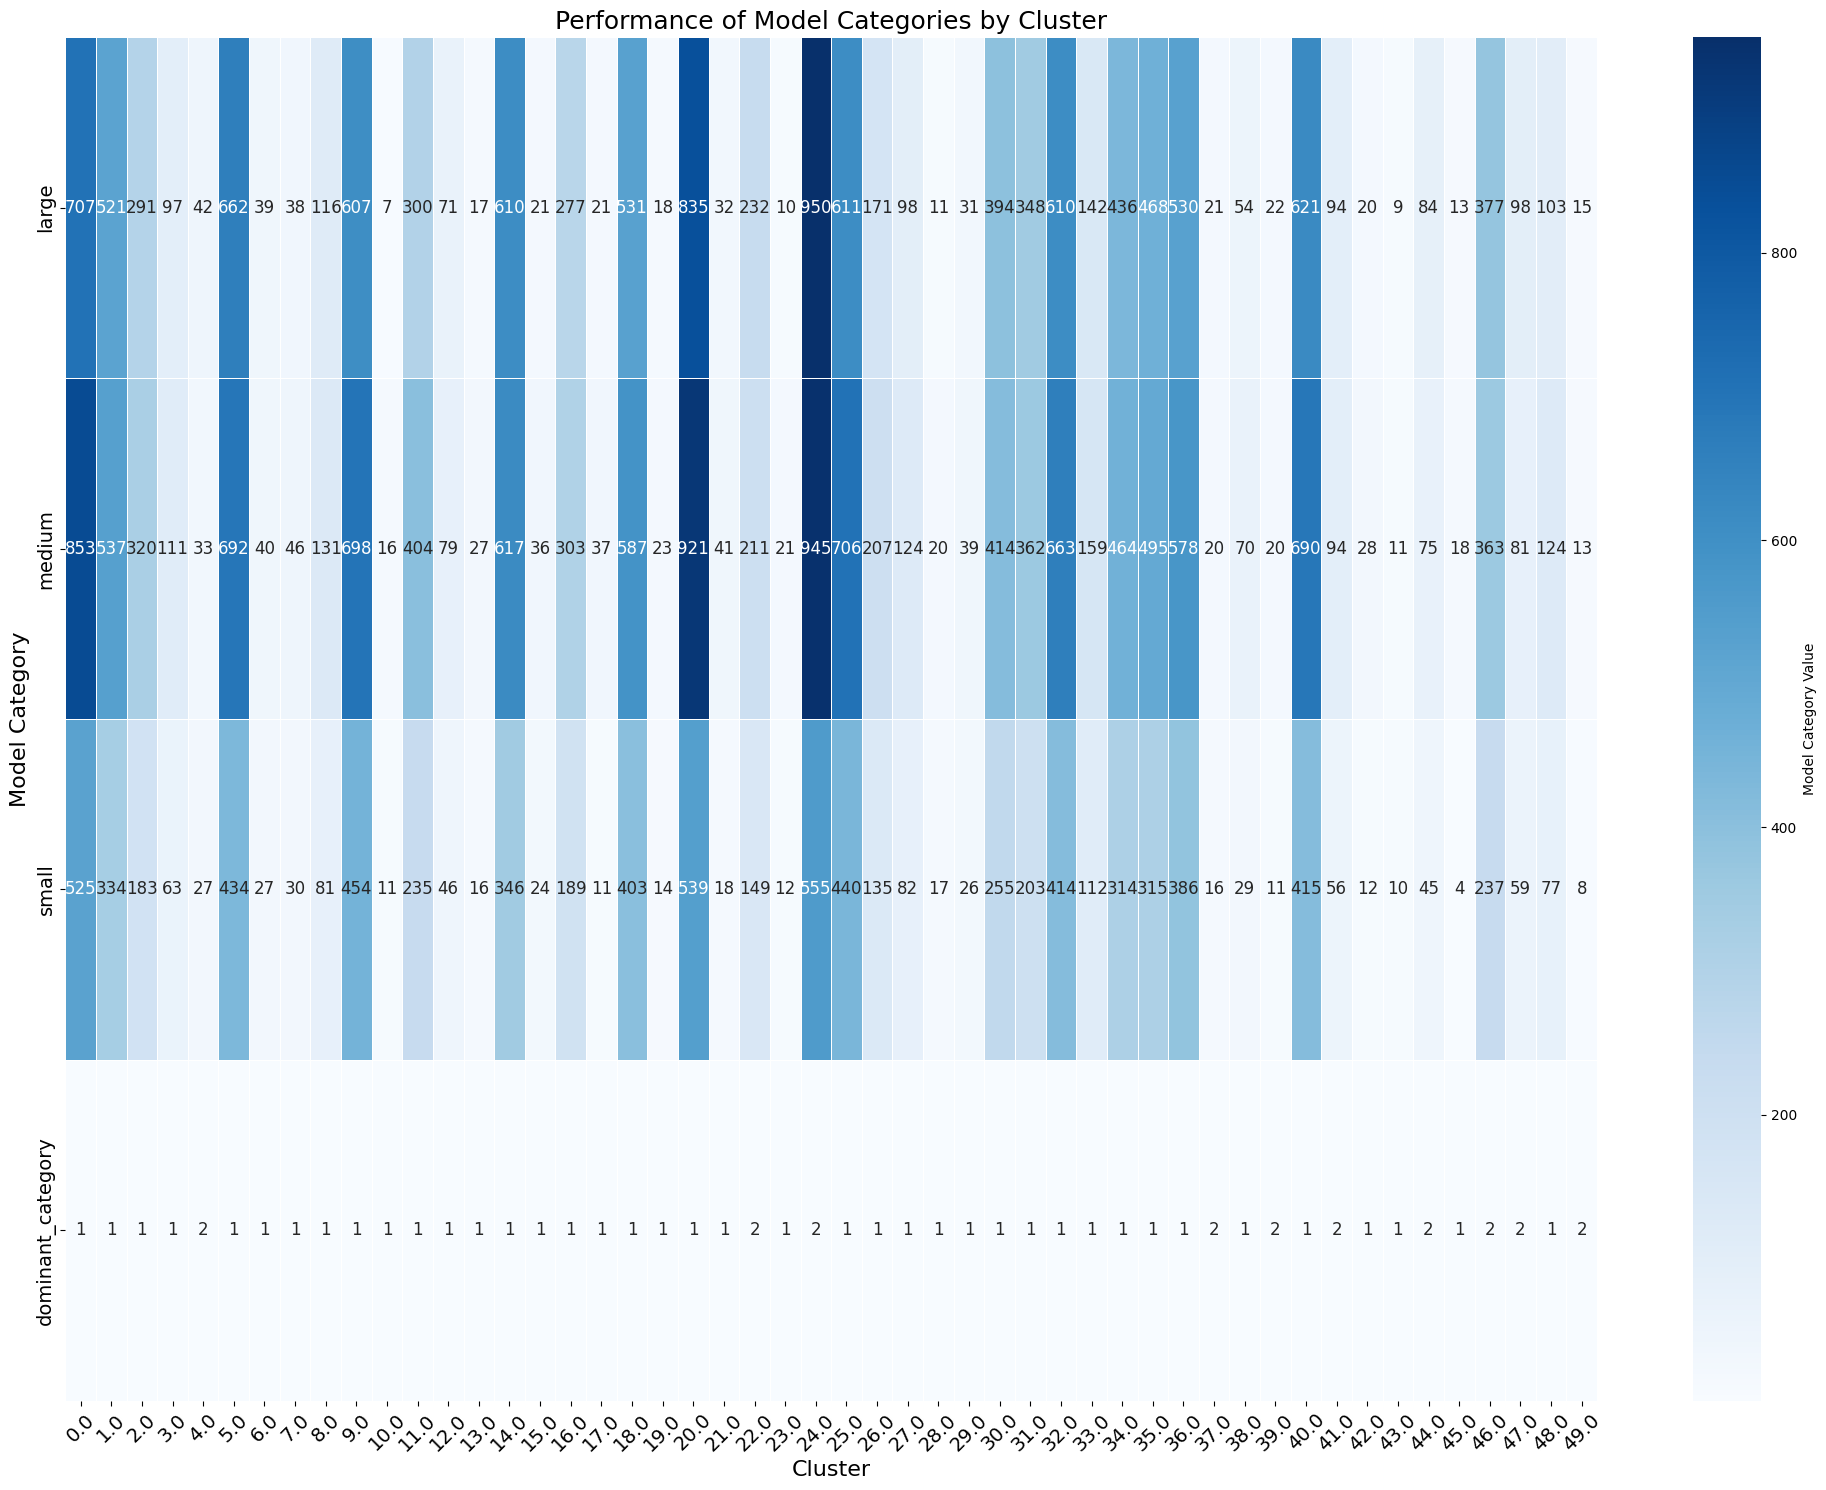

In [ ]:
'''import seaborn as sns

# Create a mapping for the model categories to numeric values
category_mapping = {'large': 2, 'medium': 1, 'small': 0}

# Apply this mapping to the relevant columns (remove 'total' column)
numeric_data = cluster_wins.drop(columns='total').applymap(lambda x: category_mapping.get(x, x))

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.T, annot=True, fmt="d", cmap="Blues", cbar_kws={'label': 'Model Category Value'})
plt.title('Performance of Model Categories by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Model Category')
plt.show()'''
import seaborn as sns
import matplotlib.pyplot as plt

# Create a mapping for the model categories to numeric values
category_mapping = {'large': 2, 'medium': 1, 'small': 0}

# Apply this mapping to the relevant columns (remove 'total' column)
numeric_data = cluster_wins.drop(columns='total').applymap(lambda x: category_mapping.get(x, x))

# Plot heatmap with an even larger figure size
plt.figure(figsize=(20, 15))  # Significantly increase figure size
sns.heatmap(
    numeric_data.T,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar_kws={'label': 'Model Category Value'},
    annot_kws={"size": 12},  # Adjust font size of annotations
    linewidths=0.5  # Add spacing between cells
)
plt.title('Performance of Model Categories by Cluster', fontsize=18)
plt.xlabel('Cluster', fontsize=16)
plt.ylabel('Model Category', fontsize=16)
plt.xticks(rotation=45, fontsize=14)  # Rotate and adjust x-axis labels
plt.yticks(fontsize=14)  # Adjust y-axis label font size
plt.tight_layout()  # Ensure everything fits within the figure
plt.show()



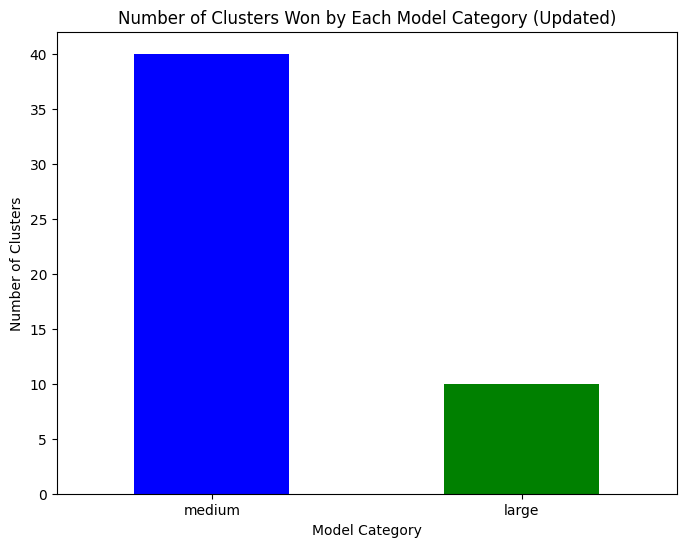

Updated Cluster Summary:
 dominant_category
medium    40
large     10
Name: count, dtype: int64

All clusters are now accounted for.

Cluster Topics for All Clusters:
Cluster 0: Creative storytelling and whimsical narratives
Cluster 1: Factual knowledge, scientific explanations, and general trivia
Cluster 2: Programming and mathematical problem-solving
Cluster 3: Simple greetings and casual conversation
Cluster 4: Logic puzzles and problem-solving scenarios
Cluster 5: Technical commands and hardware/software usage
Cluster 6: Detailed explanations and analytical thinking
Cluster 7: Friendly greetings with minor inquiries
Cluster 8: Complex logical problems and hypothetical scenarios
Cluster 9: Advanced writing tasks and content generation
Cluster 10: Minimalistic or repetitive instructions
Cluster 11: Travel-related queries and natural observations
Cluster 12: Basic categorization and simple questions
Cluster 13: Philosophical questions and existential thoughts
Cluster 14: Humorous and 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure all 50 clusters are included in cluster_wins
for cluster in range(50):
    if cluster not in cluster_wins.index:
        cluster_wins.loc[cluster] = {"dominant_category": "none", "count": 0}

# Recompute the cluster summary
cluster_summary = cluster_wins['dominant_category'].value_counts()

# Plot a bar chart of the count of clusters dominated by each model category
cluster_summary.plot(kind='bar', color=['blue', 'green', 'red', 'orange', 'grey'], figsize=(8, 6))
plt.title('Number of Clusters Won by Each Model Category (Updated)')
plt.xlabel('Model Category')
plt.ylabel('Number of Clusters')
plt.xticks(rotation=0)
plt.show()

# Print the updated cluster summary
print("Updated Cluster Summary:\n", cluster_summary)

# Identify and print missing clusters and their topics
missing_clusters = set(range(50)) - set(cluster_wins.index)
if missing_clusters:
    print("\nMissing Clusters and Their Topics:")
    for cluster in missing_clusters:
        cluster_topic = cluster_topics.get(cluster, "Unknown Topic")
        print(f"Cluster {cluster}: {cluster_topic}")
else:
    print("\nAll clusters are now accounted for.")

# Print the cluster topics for all clusters
print("\nCluster Topics for All Clusters:")
for cluster in range(50):
    cluster_topic = cluster_topics.get(cluster, "Unknown Topic")
    print(f"Cluster {cluster}: {cluster_topic}")

# Additional part: Print cluster topics that won for each model category
for category in cluster_summary.index:
    print(f"\nModel Category: {category}")
    winning_clusters = cluster_wins[cluster_wins['dominant_category'] == category].index
    for cluster in winning_clusters:
        cluster_topic = cluster_topics.get(cluster, "Unknown Topic")
        print(f"Cluster {cluster}: {cluster_topic}")


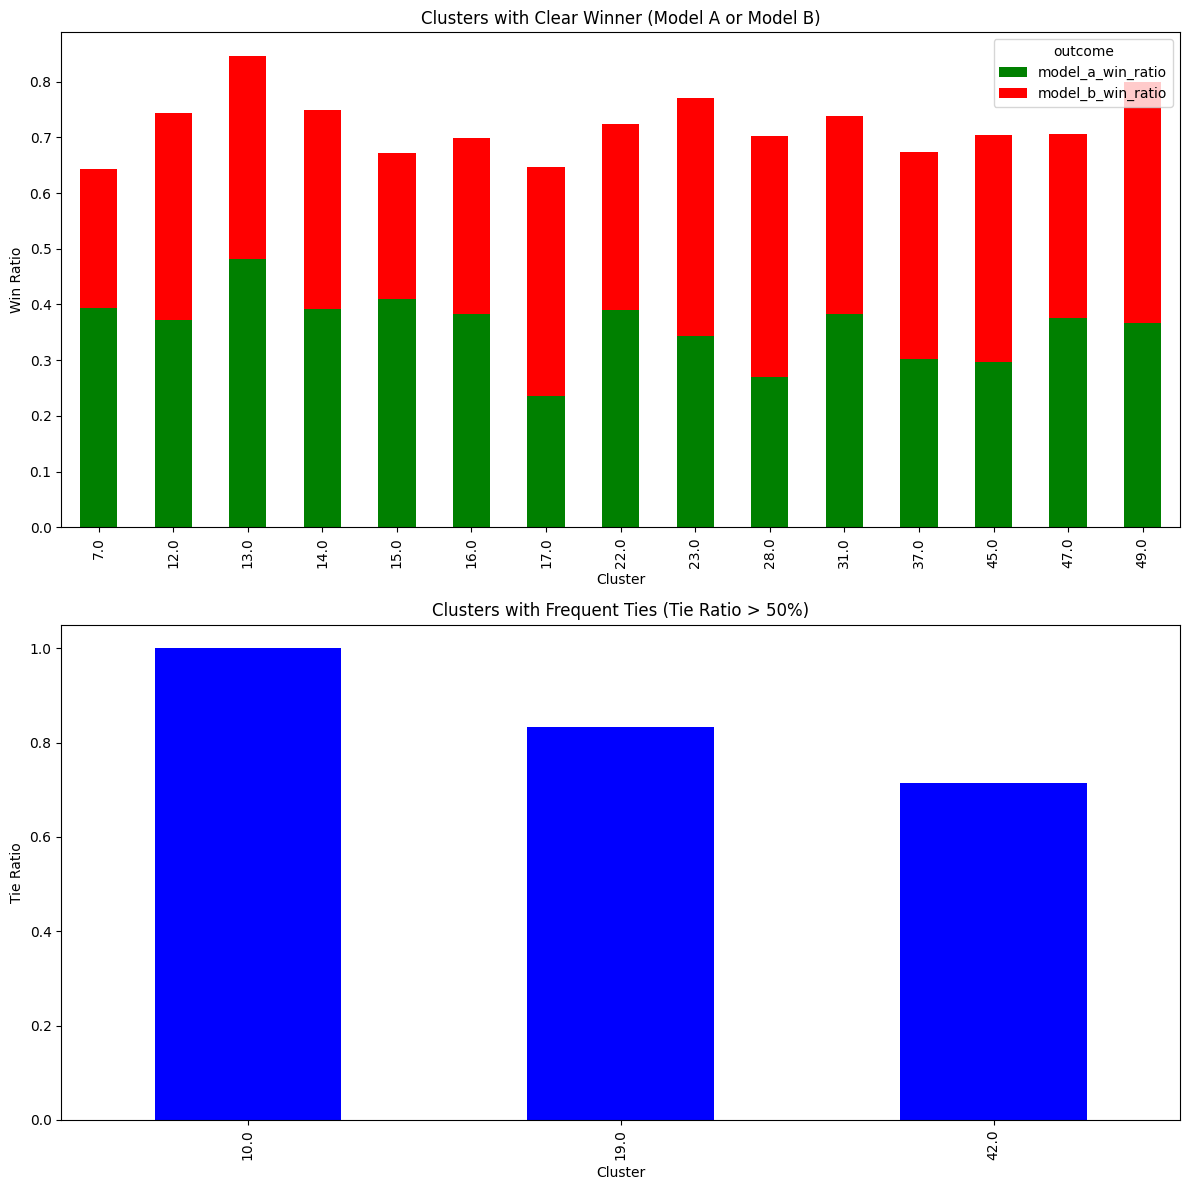

Clusters with Clear Winner (Model A or Model B):
Cluster 7.0 (Friendly greetings with minor inquiries): Model A Win Ratio = 0.39285714285714285, Model B Win Ratio = 0.25
Cluster 12.0 (Basic categorization and simple questions): Model A Win Ratio = 0.3717948717948718, Model B Win Ratio = 0.3717948717948718
Cluster 13.0 (Philosophical questions and existential thoughts): Model A Win Ratio = 0.4807692307692308, Model B Win Ratio = 0.36538461538461536
Cluster 14.0 (Humorous and satirical creative content): Model A Win Ratio = 0.3918918918918919, Model B Win Ratio = 0.35771065182829886
Cluster 15.0 (Creative writing of haikus and poetry): Model A Win Ratio = 0.4098360655737705, Model B Win Ratio = 0.26229508196721313
Cluster 16.0 (Political and world affairs discussions): Model A Win Ratio = 0.3824027072758037, Model B Win Ratio = 0.3164128595600677
Cluster 17.0 (Quick trivia and wordplay): Model A Win Ratio = 0.23529411764705882, Model B Win Ratio = 0.4117647058823529
Cluster 22.0 (Poetry 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data_path = '/content/single_turn_with_prompt_cleaned.csv'
df = pd.read_csv(data_path)

# Map prompts to clusters (topics)
df['cluster'] = df['prompt_cleaned'].map(prompt_to_cluster)

# Remove rows where model_category_a is the same as model_category_b (no competition)
df = df[df['model_category_a'] != df['model_category_b']]

# Function to determine if there is a winner (clear or tie)
def determine_winner(row):
    if row['winner_model_a'] == 1:
        return 'model_a_win'
    elif row['winner_model_b'] == 1:
        return 'model_b_win'
    elif row['winner_tie'] == 1:
        return 'tie'
    return 'no_result'

# Apply function to classify each row
df['outcome'] = df.apply(determine_winner, axis=1)

# Group by topic (cluster) and outcome
outcome_by_topic = df.groupby(['cluster', 'outcome']).size().unstack(fill_value=0)

# Calculate win/tie ratios for each cluster
outcome_by_topic['total'] = outcome_by_topic.sum(axis=1)
outcome_by_topic['model_a_win_ratio'] = outcome_by_topic['model_a_win'] / outcome_by_topic['total']
outcome_by_topic['model_b_win_ratio'] = outcome_by_topic['model_b_win'] / outcome_by_topic['total']
outcome_by_topic['tie_ratio'] = outcome_by_topic['tie'] / outcome_by_topic['total']

# Define a threshold for a "clear winner" and "frequent tie"
clear_winner_threshold = 0.37  # 35% win ratio (updated)
tie_threshold = 0.5  # 50% tie ratio

# Identify clusters with clear winners (Model A or Model B with > 35% win ratio, tie ratio < 30%)
clear_winners = outcome_by_topic[
    ((outcome_by_topic['model_a_win_ratio'] > clear_winner_threshold) & (outcome_by_topic['tie_ratio'] < (1 - clear_winner_threshold))) |
    ((outcome_by_topic['model_b_win_ratio'] > clear_winner_threshold) & (outcome_by_topic['tie_ratio'] < (1 - clear_winner_threshold)))
]

# Identify clusters with frequent ties (tie ratio > 50%)
frequent_ties = outcome_by_topic[outcome_by_topic['tie_ratio'] > tie_threshold]

# Plotting the results
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Plot clusters with clear winners
clear_winners[['model_a_win_ratio', 'model_b_win_ratio']].plot(kind='bar', stacked=True, ax=ax[0], color=['green', 'red'])
ax[0].set_title('Clusters with Clear Winner (Model A or Model B)')
ax[0].set_xlabel('Cluster')
ax[0].set_ylabel('Win Ratio')
ax[0].set_xticklabels(clear_winners.index, rotation=90)

# Plot clusters with frequent ties
frequent_ties['tie_ratio'].plot(kind='bar', color='blue', ax=ax[1])
ax[1].set_title('Clusters with Frequent Ties (Tie Ratio > 50%)')
ax[1].set_xlabel('Cluster')
ax[1].set_ylabel('Tie Ratio')
ax[1].set_xticklabels(frequent_ties.index, rotation=90)

plt.tight_layout()
plt.show()

# Display the clusters with clear winners and their topics
print("Clusters with Clear Winner (Model A or Model B):")
for cluster in clear_winners.index:
    cluster_topic = cluster_topics.get(cluster, "Unknown Topic")  # Get topic name from cluster_topics
    print(f"Cluster {cluster} ({cluster_topic}): Model A Win Ratio = {clear_winners.loc[cluster, 'model_a_win_ratio']}, Model B Win Ratio = {clear_winners.loc[cluster, 'model_b_win_ratio']}")

# Display the clusters with frequent ties and their topics
print("\nClusters with Frequent Ties (Tie Ratio > 50%):")
for cluster in frequent_ties.index:
    cluster_topic = cluster_topics.get(cluster, "Unknown Topic")  # Get topic name from cluster_topics
    print(f"Cluster {cluster} ({cluster_topic}): Tie Ratio = {frequent_ties.loc[cluster, 'tie_ratio']}")


<ipython-input-42-17fdcc8df849>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', k)  # Get distinct colors from the 'tab20' colormap


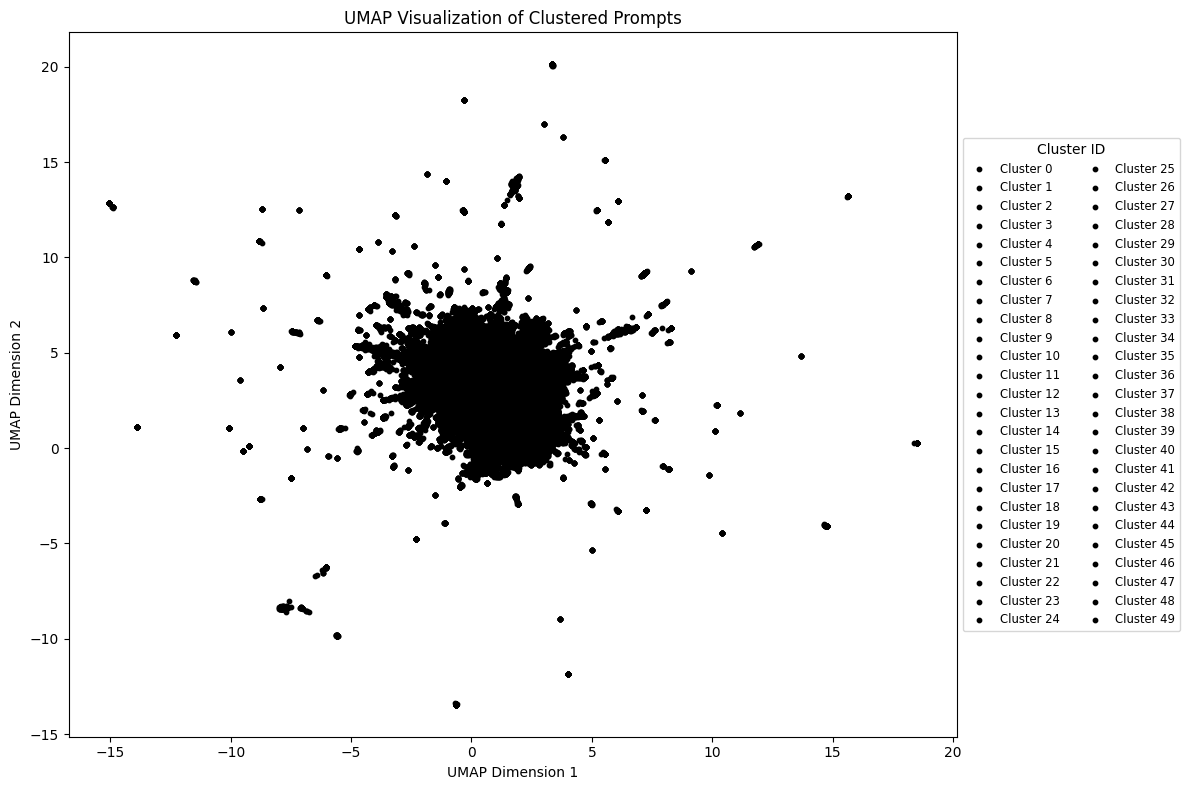

In [ ]:
# Define a color palette for the clusters
colors = plt.cm.get_cmap('tab20', k)  # Get distinct colors from the 'tab20' colormap

# Step 4: Plot the UMAP clusters
plt.figure(figsize=(12, 8))

# Plot each cluster with its corresponding color
for cluster_id in range(k):
    cluster_points = umap_embeddings[clusters == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                color="black",
                label=f"Cluster {cluster_id}",
                s=10)  # Use smaller markers (s=10) for better visualization

# Customize the plot
plt.title("UMAP Visualization of Clustered Prompts")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")

# Add the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Cluster ID", ncol=2, fontsize='small')

# Show the plot
plt.tight_layout()
plt.show()

#5D


In [ ]:
# Step 1: Apply UMAP for dimensionality reduction to 5D
umap_reducer_5d = umap.UMAP(n_components=5, n_neighbors=25, min_dist=0.05, random_state=42)
umap_embeddings_5d = umap_reducer_5d.fit_transform(embeddings)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
# Load the clean prompts from the pickle file
with open('/content/prompts.pkl', 'rb') as f:
    prompts = pickle.load(f)

# Load the precomputed embeddings for the clean prompts
embeddings = np.load('/content/paraphraseMini_prompt_embeddings.npy')

In [ ]:
# Step 2: Apply K-means on the 5D UMAP-reduced data
k = 50
kmeans_5d = KMeans(n_clusters=k, random_state=42)
clusters_5d = kmeans_5d.fit_predict(umap_embeddings_5d)

In [ ]:

# Step 3: Map prompts to their corresponding clusters
clustered_prompts_5d = defaultdict(list)
for i, cluster in enumerate(clusters_5d):
    clustered_prompts_5d[cluster].append(prompts[i])

In [ ]:
clustered_topics = {
    0: "Corporal punishment, justice, and personal conflict",
    1: "Technical commands, memory and phone specs",
    2: "Casual greetings",
    3: "Apples, fruit, and word associations",
    4: "Casual greetings",
    5: "Weight comparisons and logic puzzles",
    6: "Science questions, metals, and sports teams",
    7: "Character references, legal matters, and humor",
    8: "Casual greetings",
    9: "Pop culture, old news retrieval, and predictions",
    10: "Legal and real estate discussions, paraphrasing",
    11: "Humor, pranks, and whimsical stories",
    12: "Programming tasks and equations",
    13: "Philosophy and meaning of life",
    14: "Instructions, language translation, and context-based responses",
    15: "Testing, unit testing, and code execution",
    16: "Hypothetical scenarios, political commentary",
    17: "Original jokes and humor",
    18: "Woodchucks, spelling, and humorous wordplay",
    19: "Naming children and etymology of names",
    20: "Family dynamics and names",
    21: "Travel options, software issues, and fish care",
    22: "Grammatical accuracy and random nonfiction book titles",
    23: "Waiting prompts",
    24: "Function calling and classifier building",
    25: "Writing single dot prompts",
    26: "Agree/disagree statements and societal views",
    27: "Step-by-step explanations and book-related tasks",
    28: "Time-related questions for drying towels and clothes",
    29: "Jokes involving animals and profile completion",
    30: "Food Preparation and Recipe Suggestions",
    31: "Technical Concepts and Programming",
    32: "Database Querying and Design",
    33: "Creative Inspiration and Art",
    34: "Poetry and Creative Writing",
    35: "Life, Bacteria, and Surreal Stories",
    36: "Casual Greetings and Simple Statements",
    37: "Riddles and Speed Comparisons",
    38: "Swallow Velocity and Physics",
    39: "Cypher Querying and Technical Concepts",
    40: "Fundamentals of Time and Miscellaneous",
    41: "Color and Descriptions of the Sky",
    42: "Expressions of Love",
    43: "Nuclear Fusion and Quantum Questions",
    44: "Date and Weather Inquiries",
    45: "Rap Battles and Lyrics Writing",
    46: "Word Games and Literary Questions",
    47: "Supplementary Information and Writing Style",
    48: "Humorous and Gaming References",
    49: "Sisters, Games, and Playful Scenarios"
}

# Step 4: Print the number of prompts in each cluster (Summary)
print("Cluster Summary (Number of Prompts in Each Cluster):")
for cluster in sorted(clustered_prompts_5d.keys()):  # Sort cluster keys
    cluster_prompts = clustered_prompts_5d[cluster]
    cluster_name = clustered_topics.get(cluster, "Unknown Cluster")
    print(f"Cluster {cluster} ({cluster_name}): {len(cluster_prompts)} prompts")

# Step 5: Inspect the first few prompts in each cluster
for cluster in sorted(clustered_prompts_5d.keys()):  # Sort cluster keys
    cluster_prompts = clustered_prompts_5d[cluster]
    cluster_name = clustered_topics.get(cluster, "Unknown Cluster")
    print(f"\nCluster {cluster} ({cluster_name}) - Sample Prompts:")
    for prompt in cluster_prompts[:3]:  # Show first 3 prompts in each cluster
        print(f"- {prompt}")



Cluster Summary (Number of Prompts in Each Cluster):
Cluster 0 (Corporal punishment, justice, and personal conflict): 2844 prompts
Cluster 1 (Technical commands, memory and phone specs): 3216 prompts
Cluster 2 (Casual greetings): 364 prompts
Cluster 3 (Apples, fruit, and word associations): 386 prompts
Cluster 4 (Casual greetings): 121 prompts
Cluster 5 (Weight comparisons and logic puzzles): 184 prompts
Cluster 6 (Science questions, metals, and sports teams): 2304 prompts
Cluster 7 (Character references, legal matters, and humor): 43 prompts
Cluster 8 (Casual greetings): 160 prompts
Cluster 9 (Pop culture, old news retrieval, and predictions): 1978 prompts
Cluster 10 (Legal and real estate discussions, paraphrasing): 3676 prompts
Cluster 11 (Humor, pranks, and whimsical stories): 3176 prompts
Cluster 12 (Programming tasks and equations): 1286 prompts
Cluster 13 (Philosophy and meaning of life): 99 prompts
Cluster 14 (Instructions, language translation, and context-based responses): 10

<ipython-input-19-b42bb382b8a6>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', k)  # Get distinct colors for each cluster


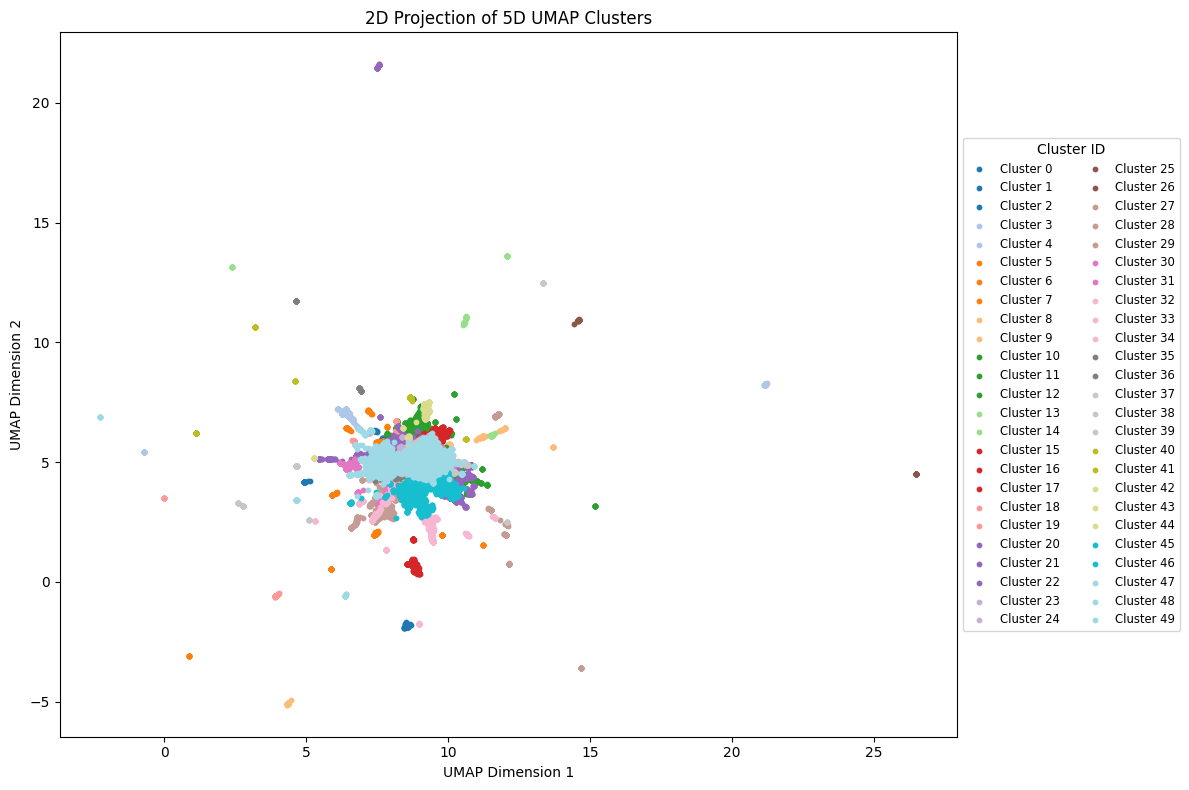

In [ ]:
# Step 6: Since we can't visualize 5D directly, let's create 2D projections of it
# Visualize the first two dimensions of the 5D UMAP embedding for simplicity

plt.figure(figsize=(12, 8))

# Define a color palette for the clusters
colors = plt.cm.get_cmap('tab20', k)  # Get distinct colors for each cluster

# Plot each cluster with its corresponding color (2D projection)
for cluster_id in range(k):
    cluster_points = umap_embeddings_5d[clusters_5d == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                color=colors(cluster_id),
                label=f"Cluster {cluster_id}",
                s=10)  # Use smaller markers (s=10)

# Customize the plot
plt.title("2D Projection of 5D UMAP Clusters")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")

# Add the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Cluster ID", ncol=2, fontsize='small')

# Show the plot
plt.tight_layout()
plt.show()

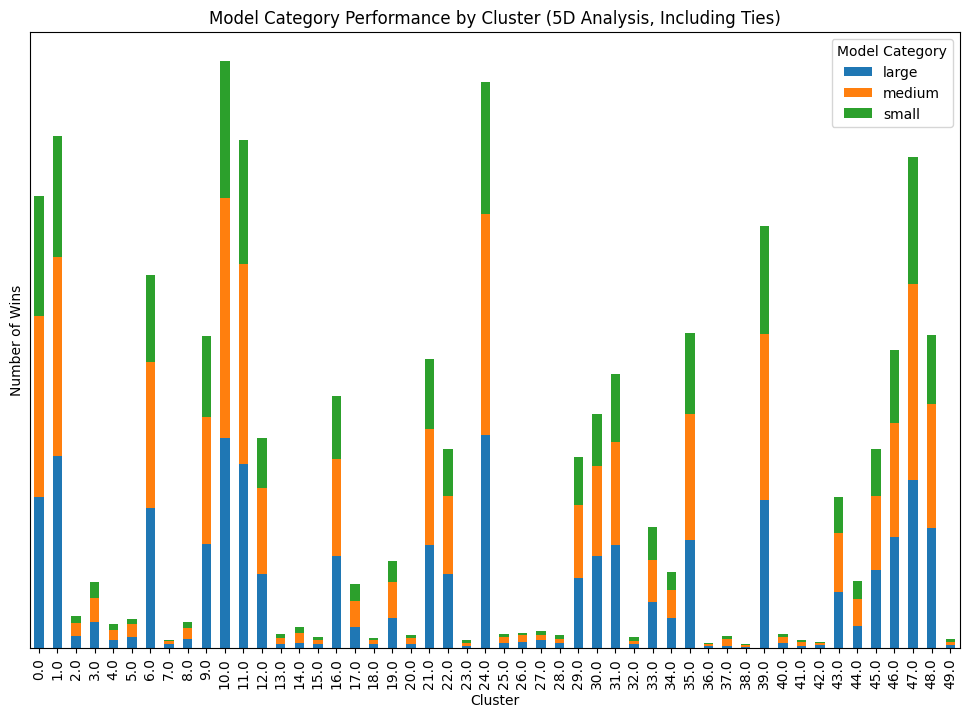

winning_categories dominant_category  total
cluster                                    
0.0                           medium   1955
1.0                           medium   2219
2.0                           medium    139
3.0                            large    286
4.0                           medium    103
5.0                           medium    127
6.0                           medium   1613
7.0                            large     36
8.0                           medium    113
9.0                           medium   1349
10.0                          medium   2541
11.0                          medium   2198
12.0                          medium    909
13.0                          medium     60
14.0                          medium     89
15.0                           large     47
16.0                          medium   1091
17.0                          medium    278
18.0                          medium     43
19.0                          medium    374
20.0                          me

In [ ]:
# Step 3: Map prompts to their clusters
prompt_to_cluster_5d = {prompt: cluster for prompt, cluster in zip(prompts, clusters_5d)}

# Load the updated dataset
data_path = '/content/single_turn_with_prompt_cleaned.csv'
df = pd.read_csv(data_path)

# Map prompts to clusters (5D)
df['cluster'] = df['prompt_cleaned'].map(prompt_to_cluster_5d)

# Remove rows where model_category_a is the same as model_category_b
df = df[df['model_category_a'] != df['model_category_b']]

# Function to determine the winner (count ties as wins for both models)
def determine_winner(row):
    if row['winner_model_a'] == 1:
        return [row['model_category_a']]
    elif row['winner_model_b'] == 1:
        return [row['model_category_b']]
    elif row['winner_tie'] == 1:
        return [row['model_category_a'], row['model_category_b']]
    return []

# Apply the function to calculate the winning categories
df['winning_categories'] = df.apply(determine_winner, axis=1)

# Explode the list of winners to create separate rows for ties
df_exploded = df.explode('winning_categories')

# Group by cluster and winning category
cluster_wins_5d = df_exploded.groupby('cluster')['winning_categories'].value_counts().unstack(fill_value=0)
cluster_wins_5d['total'] = cluster_wins_5d.sum(axis=1)

# Plotting the data
cluster_wins_5d.drop(columns='total').plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Model Category Performance by Cluster (5D Analysis, Including Ties)')
plt.xlabel('Cluster')
plt.ylabel('Number of Wins')
plt.legend(title='Model Category')

# Remove y-axis numbers
plt.yticks([])

plt.show()

# Display the dominant category for each cluster
cluster_wins_5d['dominant_category'] = cluster_wins_5d.drop(columns='total').idxmax(axis=1)
print(cluster_wins_5d[['dominant_category', 'total']])

<ipython-input-21-daafca774e61>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  numeric_data_5d = cluster_wins_5d.drop(columns='total').applymap(lambda x: category_mapping.get(x, x))


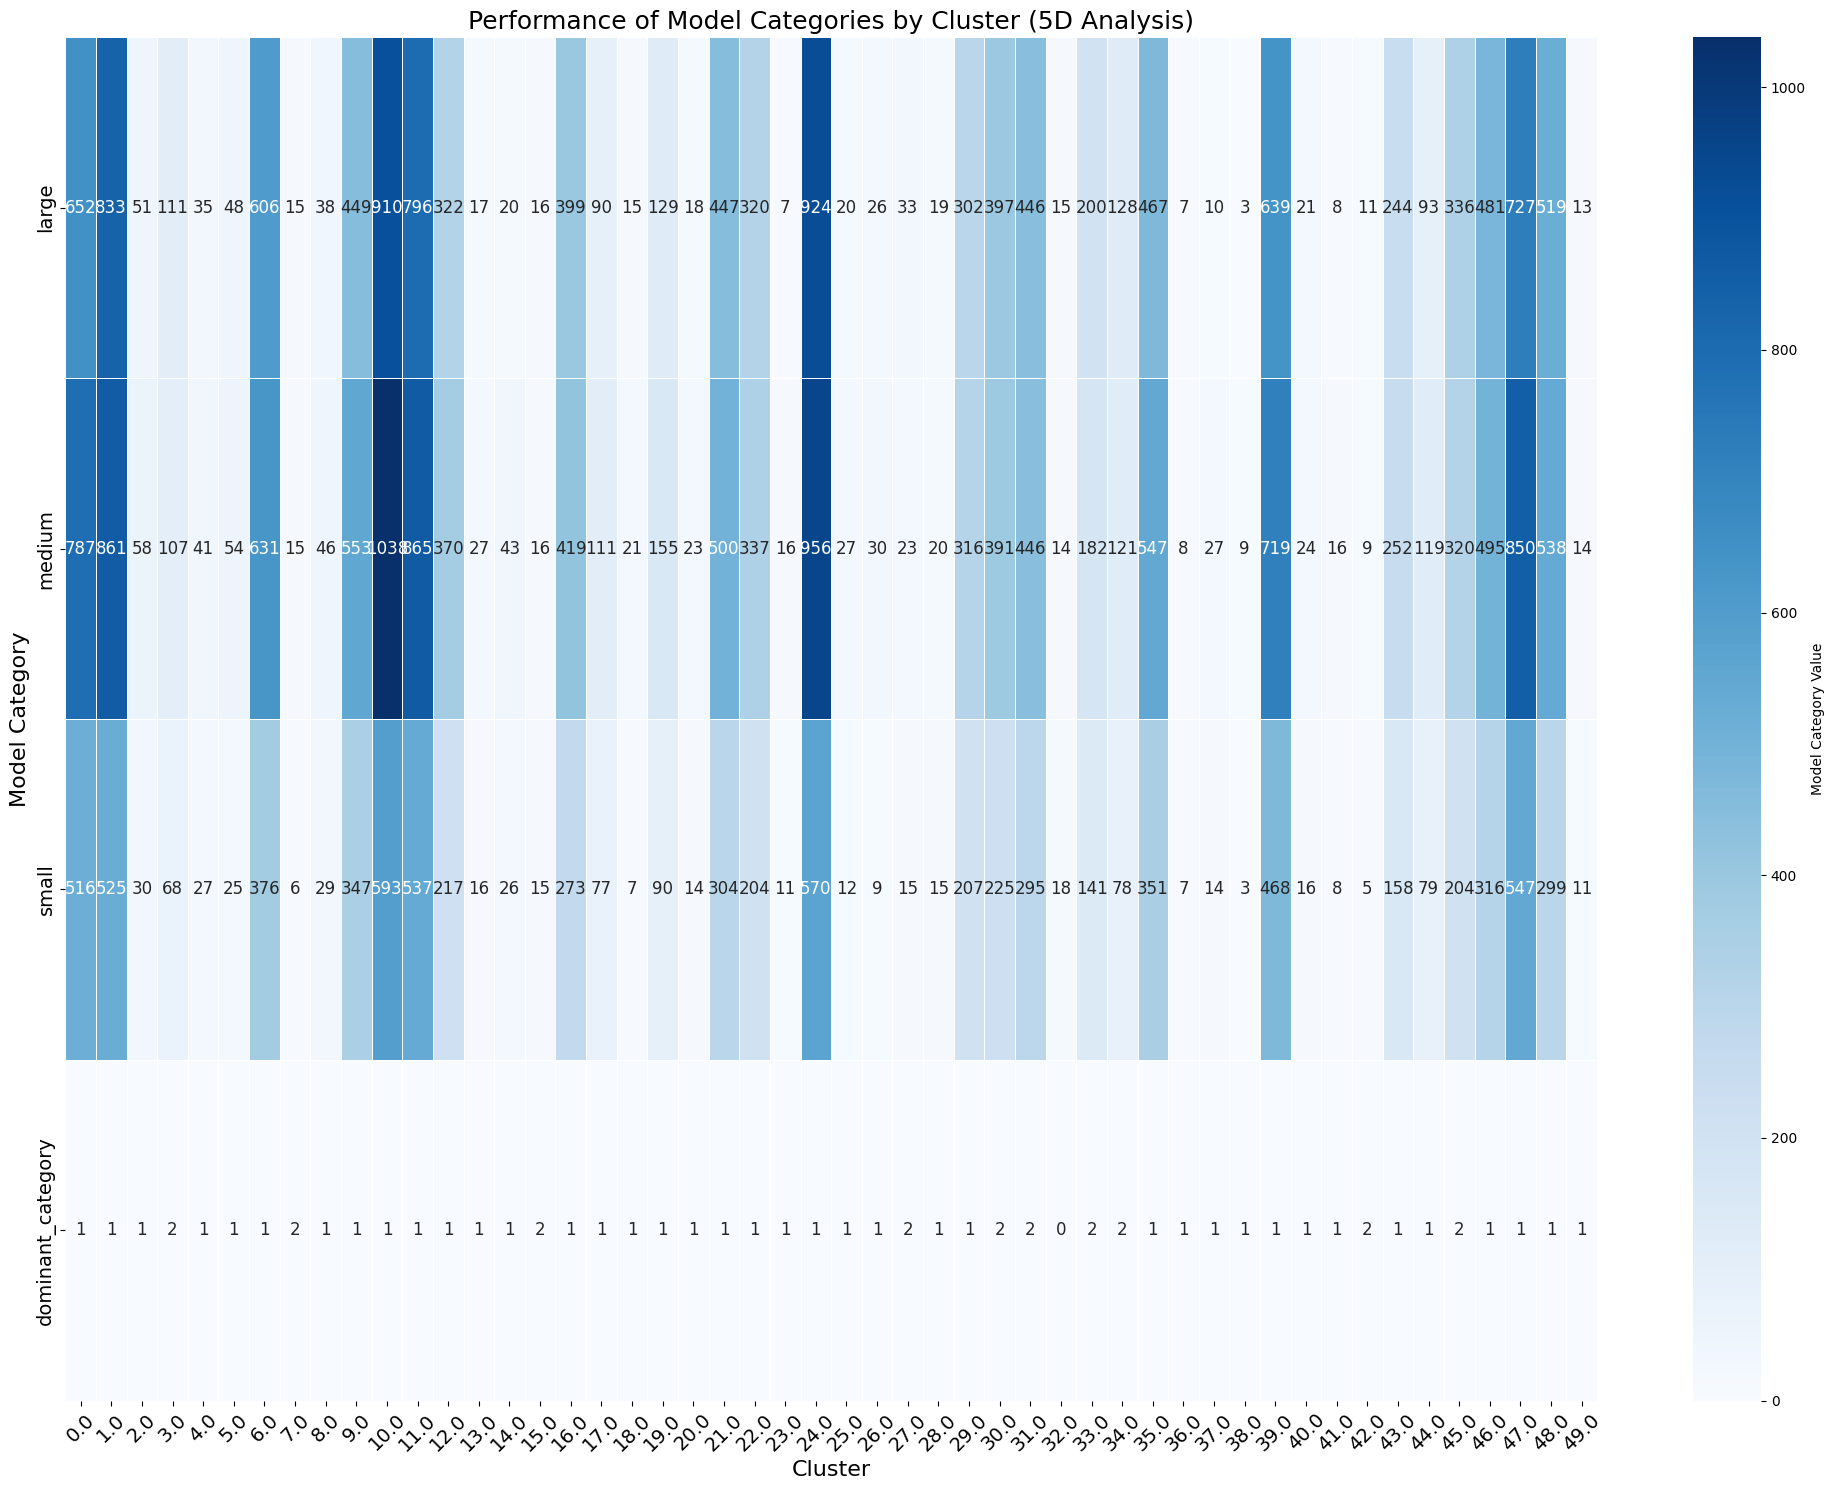

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a mapping for the model categories to numeric values
category_mapping = {'large': 2, 'medium': 1, 'small': 0}

# Apply this mapping to the relevant columns (remove 'total' column from 5D analysis results)
numeric_data_5d = cluster_wins_5d.drop(columns='total').applymap(lambda x: category_mapping.get(x, x))

# Plot heatmap with enhancements
plt.figure(figsize=(20, 15))  # Significantly increase figure size
sns.heatmap(
    numeric_data_5d.T,  # Transpose for better visualization
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar_kws={'label': 'Model Category Value'},
    annot_kws={"size": 12},  # Adjust font size of annotations
    linewidths=0.5  # Add spacing between cells
)
plt.title('Performance of Model Categories by Cluster (5D Analysis)', fontsize=18)
plt.xlabel('Cluster', fontsize=16)
plt.ylabel('Model Category', fontsize=16)
plt.xticks(rotation=45, fontsize=14)  # Rotate and adjust x-axis labels
plt.yticks(fontsize=14)  # Adjust y-axis label font size
plt.tight_layout()  # Ensure everything fits within the figure
plt.show()


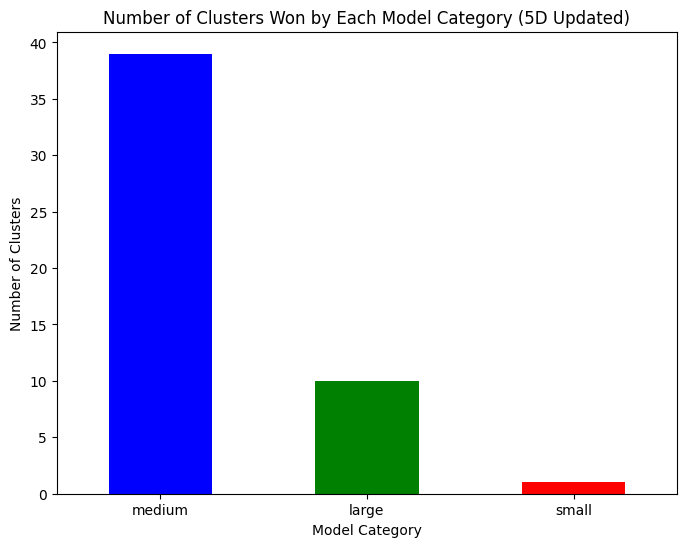

Updated Cluster Summary (5D):
 dominant_category
medium    39
large     10
small      1
Name: count, dtype: int64

All clusters are now accounted for (5D).

Cluster Topics for All Clusters (5D):
Cluster 0: Corporal punishment, justice, and personal conflict
Cluster 1: Technical commands, memory and phone specs
Cluster 2: Casual greetings
Cluster 3: Apples, fruit, and word associations
Cluster 4: Casual greetings
Cluster 5: Weight comparisons and logic puzzles
Cluster 6: Science questions, metals, and sports teams
Cluster 7: Character references, legal matters, and humor
Cluster 8: Casual greetings
Cluster 9: Pop culture, old news retrieval, and predictions
Cluster 10: Legal and real estate discussions, paraphrasing
Cluster 11: Humor, pranks, and whimsical stories
Cluster 12: Programming tasks and equations
Cluster 13: Philosophy and meaning of life
Cluster 14: Instructions, language translation, and context-based responses
Cluster 15: Testing, unit testing, and code execution
Cluster 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure all 50 clusters are included in cluster_wins_5d
for cluster in range(50):
    if cluster not in cluster_wins_5d.index:
        cluster_wins_5d.loc[cluster] = {"dominant_category": "none", "count": 0}

# Recompute the cluster summary for 5D
cluster_summary_5d = cluster_wins_5d['dominant_category'].value_counts()

# Plot a bar chart of the count of clusters dominated by each model category (5D)
cluster_summary_5d.plot(
    kind='bar',
    color=['blue', 'green', 'red', 'orange', 'grey'],
    figsize=(8, 6)
)
plt.title('Number of Clusters Won by Each Model Category (5D Updated)')
plt.xlabel('Model Category')
plt.ylabel('Number of Clusters')
plt.xticks(rotation=0)
plt.show()

# Print the updated cluster summary
print("Updated Cluster Summary (5D):\n", cluster_summary_5d)

# Identify and print missing clusters and their topics
missing_clusters_5d = set(range(50)) - set(cluster_wins_5d.index)
if missing_clusters_5d:
    print("\nMissing Clusters and Their Topics (5D):")
    for cluster in missing_clusters_5d:
        cluster_topic = clustered_topics.get(cluster, "Unknown Topic")
        print(f"Cluster {cluster}: {cluster_topic}")
else:
    print("\nAll clusters are now accounted for (5D).")

# Print the cluster topics for all clusters (5D)
print("\nCluster Topics for All Clusters (5D):")
for cluster in range(50):
    cluster_topic = clustered_topics.get(cluster, "Unknown Topic")
    print(f"Cluster {cluster}: {cluster_topic}")

# Additional part: Print cluster topics that won for each model category (5D)
for category in cluster_summary_5d.index:
    print(f"\nModel Category: {category}")
    winning_clusters = cluster_wins_5d[cluster_wins_5d['dominant_category'] == category].index
    for cluster in winning_clusters:
        cluster_topic = clustered_topics.get(cluster, "Unknown Topic")
        print(f"Cluster {cluster}: {cluster_topic}")


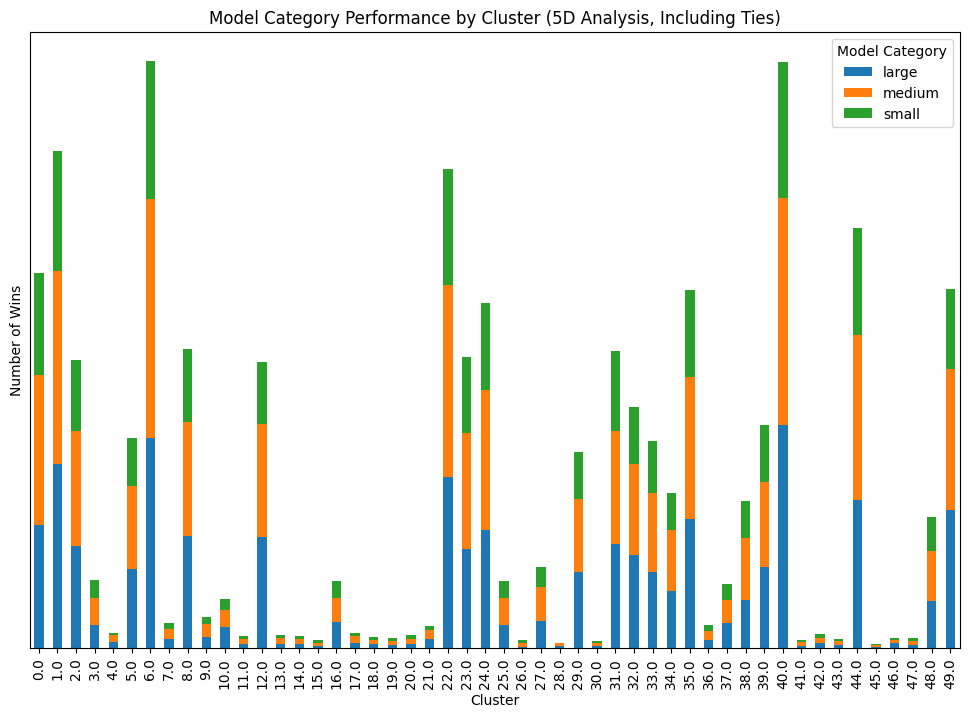

winning_categories dominant_category  total
cluster                                    
0.0                           medium   1685
1.0                           medium   2233
2.0                           medium   1293
3.0                           medium    303
4.0                           medium     65
5.0                           medium    942
6.0                           medium   2639
7.0                           medium    114
8.0                           medium   1346
9.0                           medium    138
10.0                           large    218
11.0                          medium     53
12.0                          medium   1286
13.0                          medium     60
14.0                          medium     55
15.0                          medium     34
16.0                           large    302
17.0                          medium     66
18.0                           large     47
19.0                          medium     45
20.0                          me

<ipython-input-43-1cc22a9f5e84>:54: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  numeric_data_5d = cluster_wins_5d.drop(columns='total').applymap(lambda x: category_mapping.get(x, x))


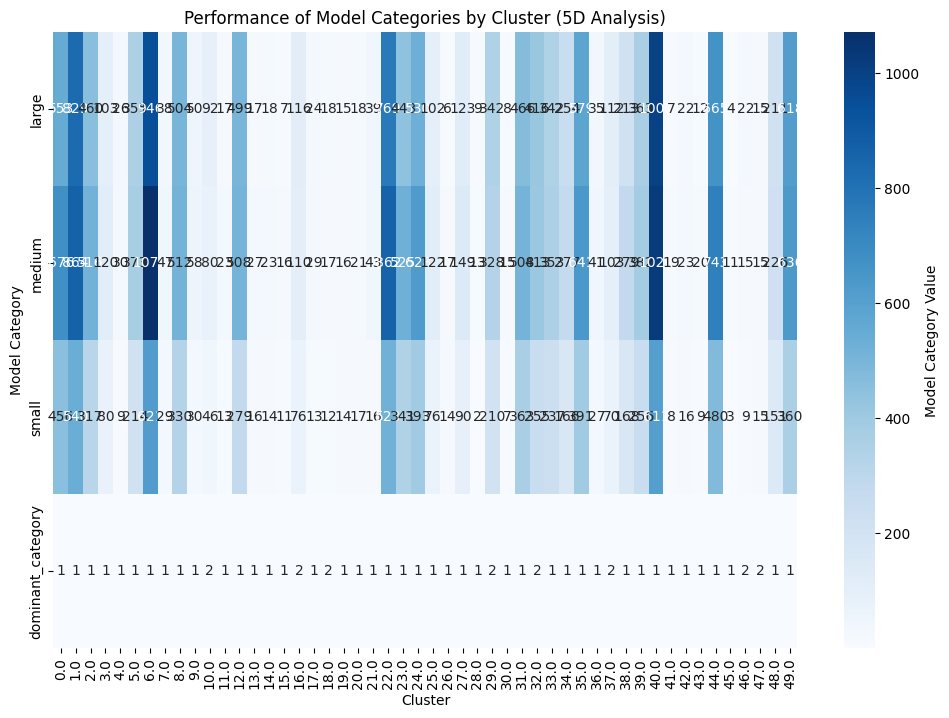

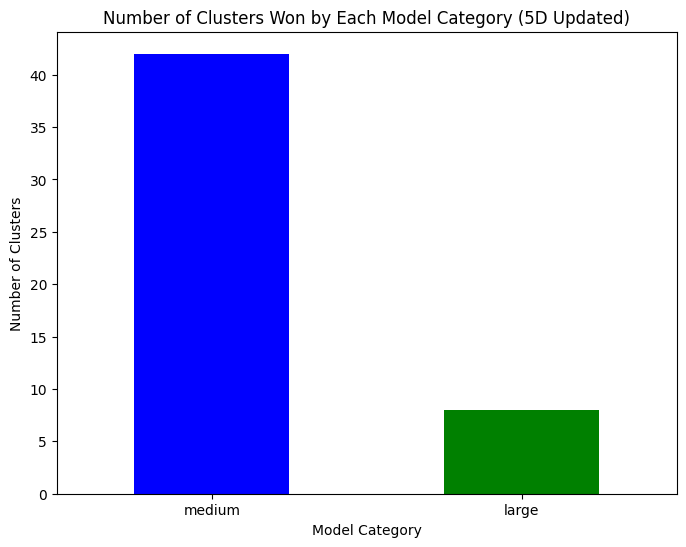

Updated Cluster Summary (5D):
 dominant_category
medium    42
large      8
Name: count, dtype: int64

Dominant Categories in Each Cluster (5D Analysis):
dominant_category
medium    42
large      8
Name: count, dtype: int64


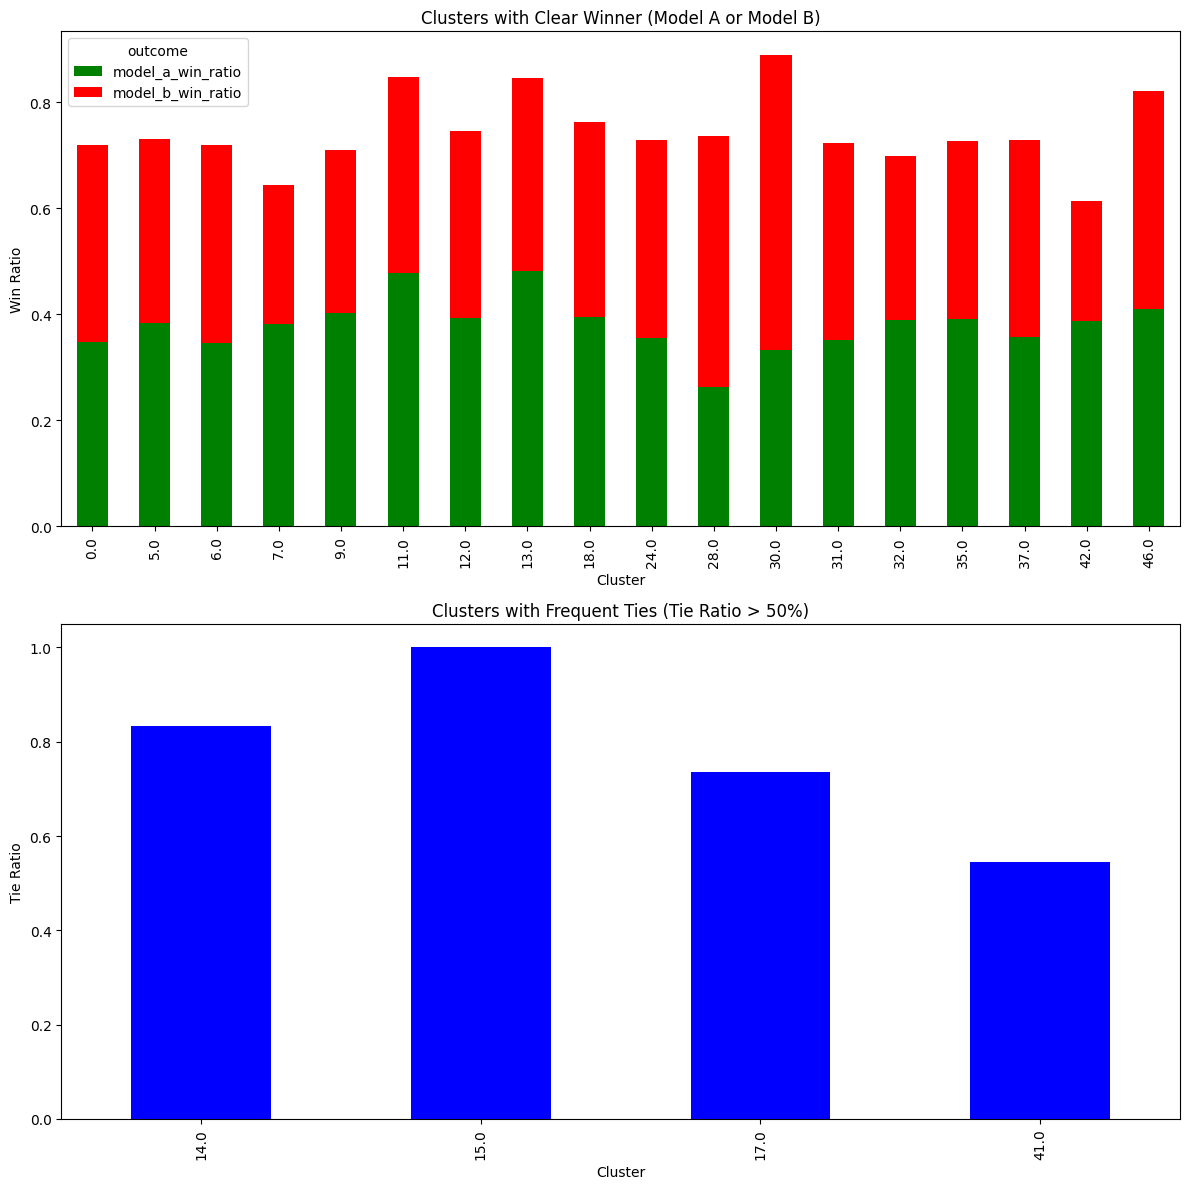

Clusters with Clear Winner (Model A or Model B):
Cluster 0.0 (Creative storytelling and whimsical narratives): Model A Win Ratio = 0.3482889733840304, Model B Win Ratio = 0.3703422053231939
Cluster 5.0 (Technical commands and hardware/software usage): Model A Win Ratio = 0.38274932614555257, Model B Win Ratio = 0.3477088948787062
Cluster 6.0 (Detailed explanations and analytical thinking): Model A Win Ratio = 0.34643377001455605, Model B Win Ratio = 0.37311984473556525
Cluster 7.0 (Friendly greetings with minor inquiries): Model A Win Ratio = 0.38095238095238093, Model B Win Ratio = 0.2619047619047619
Cluster 9.0 (Advanced writing tasks and content generation): Model A Win Ratio = 0.40186915887850466, Model B Win Ratio = 0.308411214953271
Cluster 11.0 (Travel-related queries and natural observations): Model A Win Ratio = 0.4782608695652174, Model B Win Ratio = 0.3695652173913043
Cluster 12.0 (Basic categorization and simple questions): Model A Win Ratio = 0.3921951219512195, Model B Wi

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data_path = '/content/single_turn_with_prompt_cleaned.csv'
df = pd.read_csv(data_path)

# Map prompts to clusters (topics)
df['cluster'] = df['prompt_cleaned'].map(prompt_to_cluster_5d)

# Remove rows where model_category_a is the same as model_category_b (no competition)
df = df[df['model_category_a'] != df['model_category_b']]

# Function to determine if there is a winner (clear or tie)
def determine_winner(row):
    if row['winner_model_a'] == 1:
        return 'model_a_win'
    elif row['winner_model_b'] == 1:
        return 'model_b_win'
    elif row['winner_tie'] == 1:
        return 'tie'
    return 'no_result'

# Apply function to classify each row
df['outcome'] = df.apply(determine_winner, axis=1)

# Group by topic (cluster) and outcome
outcome_by_topic = df.groupby(['cluster', 'outcome']).size().unstack(fill_value=0)

# Calculate win/tie ratios for each cluster
outcome_by_topic['total'] = outcome_by_topic.sum(axis=1)
outcome_by_topic['model_a_win_ratio'] = outcome_by_topic['model_a_win'] / outcome_by_topic['total']
outcome_by_topic['model_b_win_ratio'] = outcome_by_topic['model_b_win'] / outcome_by_topic['total']
outcome_by_topic['tie_ratio'] = outcome_by_topic['tie'] / outcome_by_topic['total']

# Define a threshold for a "clear winner" and "frequent tie"
clear_winner_threshold = 0.37  # 35% win ratio (updated)
tie_threshold = 0.5  # 50% tie ratio

# Identify clusters with clear winners (Model A or Model B with > 35% win ratio, tie ratio < 30%)
clear_winners = outcome_by_topic[
    ((outcome_by_topic['model_a_win_ratio'] > clear_winner_threshold) & (outcome_by_topic['tie_ratio'] < (1 - clear_winner_threshold))) |
    ((outcome_by_topic['model_b_win_ratio'] > clear_winner_threshold) & (outcome_by_topic['tie_ratio'] < (1 - clear_winner_threshold)))
]

# Identify clusters with frequent ties (tie ratio > 50%)
frequent_ties = outcome_by_topic[outcome_by_topic['tie_ratio'] > tie_threshold]

# Plotting the results
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Plot clusters with clear winners
clear_winners[['model_a_win_ratio', 'model_b_win_ratio']].plot(kind='bar', stacked=True, ax=ax[0], color=['green', 'red'])
ax[0].set_title('Clusters with Clear Winner (Model A or Model B)')
ax[0].set_xlabel('Cluster')
ax[0].set_ylabel('Win Ratio')
ax[0].set_xticklabels(clear_winners.index, rotation=90)

# Plot clusters with frequent ties
frequent_ties['tie_ratio'].plot(kind='bar', color='blue', ax=ax[1])
ax[1].set_title('Clusters with Frequent Ties (Tie Ratio > 50%)')
ax[1].set_xlabel('Cluster')
ax[1].set_ylabel('Tie Ratio')
ax[1].set_xticklabels(frequent_ties.index, rotation=90)

plt.tight_layout()
plt.show()

# Display the clusters with clear winners and their topics
print("Clusters with Clear Winner (Model A or Model B):")
for cluster in clear_winners.index:
    cluster_topic = cluster_topics.get(cluster, "Unknown Topic")  # Get topic name from cluster_topics
    print(f"Cluster {cluster} ({cluster_topic}): Model A Win Ratio = {clear_winners.loc[cluster, 'model_a_win_ratio']}, Model B Win Ratio = {clear_winners.loc[cluster, 'model_b_win_ratio']}")

# Display the clusters with frequent ties and their topics
print("\nClusters with Frequent Ties (Tie Ratio > 50%):")
for cluster in frequent_ties.index:
    cluster_topic = cluster_topics.get(cluster, "Unknown Topic")  # Get topic name from cluster_topics
    print(f"Cluster {cluster} ({cluster_topic}): Tie Ratio = {frequent_ties.loc[cluster, 'tie_ratio']}")


<ipython-input-32-f0b468b8b582>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', k)  # Get distinct colors for each cluster


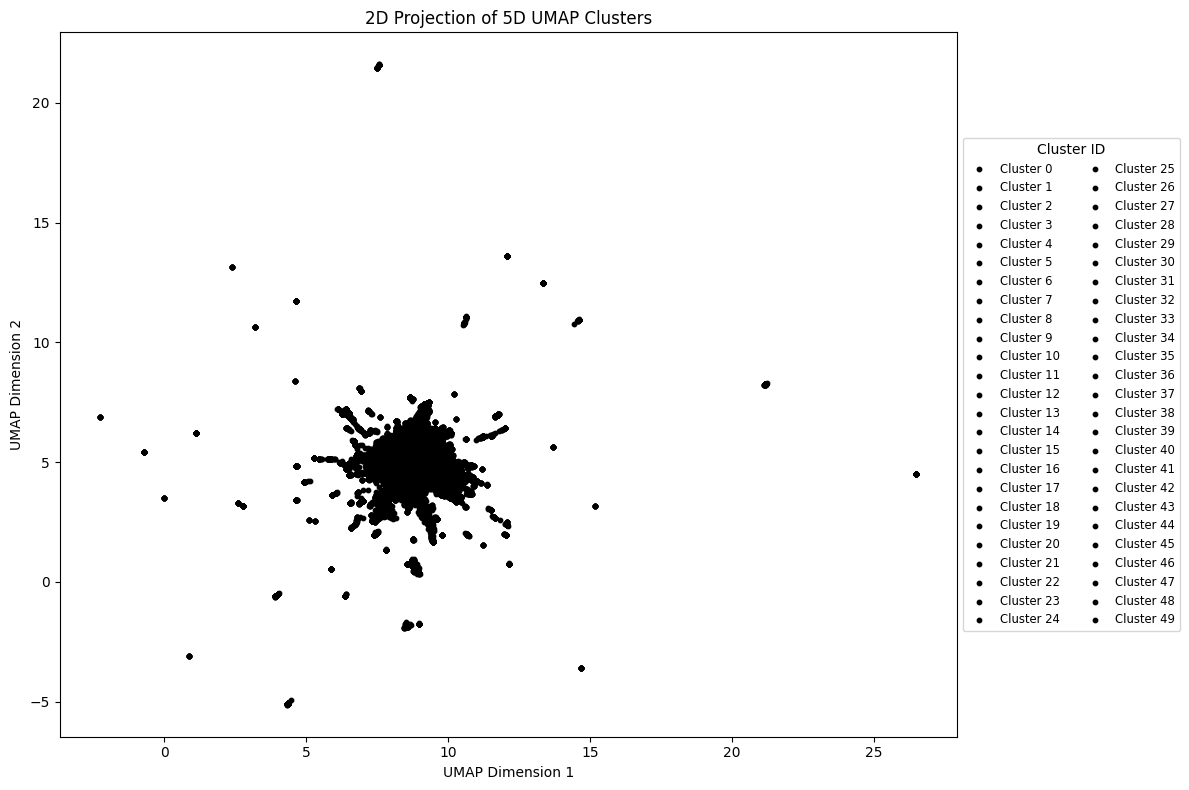

In [ ]:
# Step 6: Since we can't visualize 5D directly, let's create 2D projections of it
# Visualize the first two dimensions of the 5D UMAP embedding for simplicity

plt.figure(figsize=(12, 8))

# Define a color palette for the clusters
colors = plt.cm.get_cmap('tab20', k)  # Get distinct colors for each cluster

# Plot each cluster with its corresponding color (2D projection)
for cluster_id in range(k):
    cluster_points = umap_embeddings_5d[clusters_5d == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                color="black",
                label=f"Cluster {cluster_id}",
                s=10)

# Customize the plot
plt.title("2D Projection of 5D UMAP Clusters")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")

# Add the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Cluster ID", ncol=2, fontsize='small')

# Show the plot
plt.tight_layout()
plt.show()